## convecton 2D
$$
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0 \\

\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} + c\frac{u^{n}_{i,j} - u^{n}_{i-1,j}}{\Delta x} + c\frac{u^{n}_{i,j} - u^{n}_{i,j-1}}{\Delta y} = 0 \\

u^{n+1}_{i,j} = u^{n}_{i,j} - c \frac{\Delta t}{\Delta x}(u^{n}_{i,j}-u^{n}_{i-1,j}) - c\frac{\Delta t}{\Delta y}(u^{n}_{i,j} - u^{n}_{i,j-1})
$$
IC 

$u(x,y) =  2$ at $x,y = 2$ and 1 elsewhere

BC

$u = 1 x,y = 0,2$

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

/tmp/ipykernel_121765/938313642.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


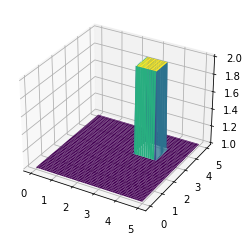

In [67]:
# constants 
c = 1

x_max = 5
y_max = 5
nx = 100
ny = 100
dx = x_max / (nx - 1)
dy = y_max / (ny - 1)
T = 10
nt = 200 
dt = T / nt
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)
#init
 
u0 = np.zeros((ny, nx))
u0[:] = 1 
u0[int(3/dy):int(4/dy), int(3/dx):int(4/dx)] = 2

fig = plt.figure()
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)


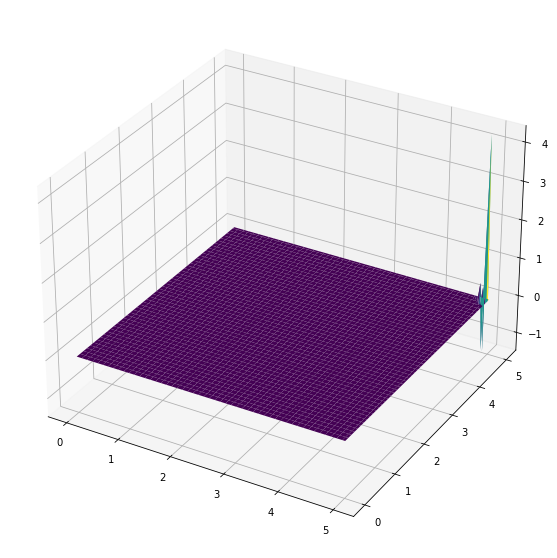

In [68]:
# finite difference 
for _ in range(nt):
    u = u0.copy()
    u = np.array(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u0[i, j] = (u[i,j] - c*(dt/dx)*(u[i,j] - u[i-1,j]) - c*(dt/dy)*(u[i,j] - u[i,j-1]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)          




MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

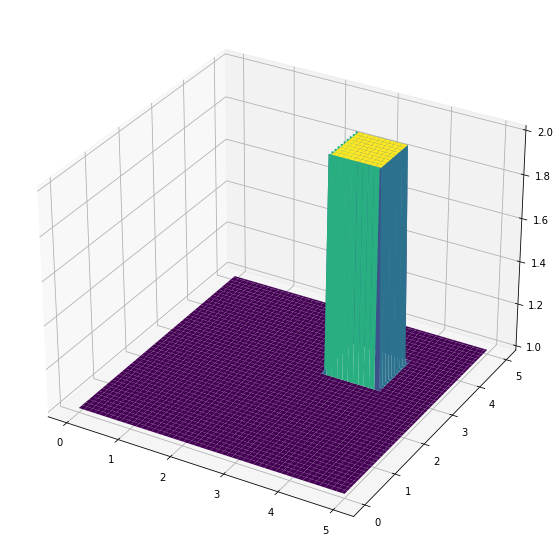

In [70]:
# animate 
# init 
 
u0 = np.zeros((ny, nx))
u0[:] = 1 
u0[int(3/dy):int(4/dy), int(3/dx):int(4/dx)] = 2


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)      

def init():
    line.set_data([],[])
    return (line,)

def animate(frames):
    xs = np.linspace(0,x_max,nx)
    u = u0.copy()       
    for _ in range(nt):
        u = u0.copy()
        u = np.array(u)
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u0[i, j] = (u[i,j] - c*(dt/dx)*(u[i,j] - u[i-1,j]) - c*(dt/dy)*(u[i,j] - u[i,j-1]))
    line.set_data(xs,u)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt)
anim.save('diffusion 1d.gif', fps = 20)
plt.show